In [256]:
import os
import sys
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.special import expit

In [257]:
FIG_FOLDER = 'fig'
SOURCE_FOLDER = os.path.join('data', 'source')
BACKUP_FOLDER = os.path.join('data', 'backup')
print(f"The source folder is: {os.path.abspath(SOURCE_FOLDER)}")
print(f"The figure folder is: {os.path.abspath(FIG_FOLDER)}")
print(f"The backup folder is: {os.path.abspath(BACKUP_FOLDER)}")

# Create folders
for f in SOURCE_FOLDER, FIG_FOLDER, BACKUP_FOLDER:
    os.makedirs(f, exist_ok=True)

The source folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/source
The figure folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/fig
The backup folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/backup


# Choose dataset

In [258]:
DATASET = "B"

# Import raw data

## ELO rating

In [259]:
data_path = os.path.join(SOURCE_FOLDER, "elo_matrix_ProspecTonk.xlsx")
df_elo = pd.read_excel(data_path)
df_elo.date = pd.to_datetime(df_elo.date)
df_elo = df_elo.set_index("date")
df_elo

,nem,yak,ner,yoh,nen,wot,pac,las,anu,ola,...,olg,jea,pat,bar,ces,lad,ber,dor,eri,fic
date,,,,,,,,,,,,,,,,,,,,,
2016-10-25,1024,1009,1018,984,991,1010,991,982,991,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-26,1032,1009,1018,1003,991,1010,982,964,991,999,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-27,1032,1009,1018,1003,991,1010,982,956,991,999,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-28,1041,1009,1018,1003,991,1010,982,956,991,999,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-29,1063,1009,1018,1011,991,1010,975,941,984,1008,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-21,938,1243,961,840,1018,1234,1379,713,1117,1287,...,933,760,841,1083,837,753,743,766,702,579
2020-10-22,970,1243,962,840,1018,1234,1347,716,1105,1296,...,935,755,841,1070,832,753,743,795,702,566
2020-10-23,971,1243,970,840,1018,1234,1347,735,1105,1296,...,920,751,841,1072,838,753,758,773,668,566


In [260]:
df_elo.to_csv(os.path.join(BACKUP_FOLDER, "df_elo.csv"))

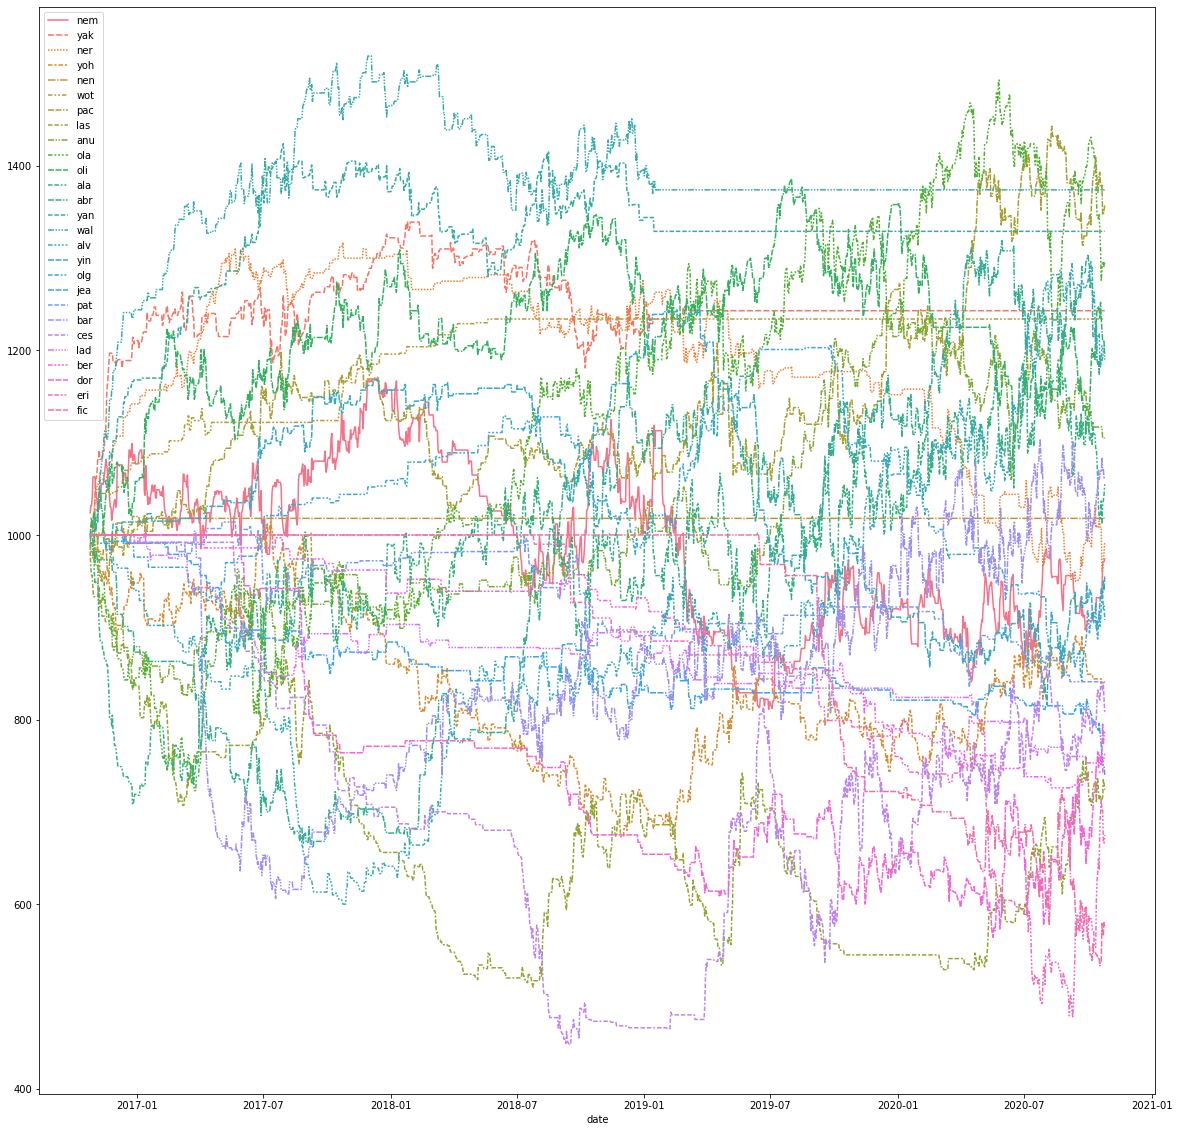

In [261]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.lineplot(data=df_elo, ax=ax)
ax.legend()
plt.show()

## Behavioral data

In [262]:
data_path = os.path.join(SOURCE_FOLDER, f"data_{DATASET}.xlsx")
df_bhv = pd.read_excel(
    data_path, 
    usecols=("monkey", "date", "choice", "stim_left_p", "stim_left_x0", "stim_right_p", 
             "stim_right_x0", "time_response", 
             "left_X", "left_Y", "right_X", "right_Y"))
df_bhv

,monkey,date,choice,stim_left_p,stim_left_x0,stim_right_p,stim_right_x0,time_response,left_X,left_Y,right_X,right_Y
0,Ola,2020-06-25None,0,0.75,2,0.75,3,528,1195.0,131.0,1195.0,517.0
1,Ola,2020-06-25None,0,0.50,3,0.25,3,506,1195.0,131.0,1195.0,517.0
2,Ola,2020-06-25None,0,0.75,2,0.75,-2,394,469.0,131.0,469.0,517.0
3,Ola,2020-06-25None,0,0.25,-2,0.25,-3,396,469.0,131.0,469.0,517.0
4,Ola,2020-06-25None,0,0.75,-1,0.75,-3,329,469.0,131.0,469.0,517.0
...,...,...,...,...,...,...,...,...,...,...,...,...
146420,Alv,2020-10-25None,0,0.25,-2,1.00,-1,1074,1195.0,131.0,1195.0,517.0
146421,Alv,2020-10-25None,0,1.00,-2,1.00,-3,1995,469.0,131.0,469.0,517.0
146422,Alv,2020-10-25None,1,0.25,3,0.75,2,843,1195.0,131.0,1195.0,517.0
146423,Alv,2020-10-25None,0,1.00,1,0.25,1,703,469.0,131.0,469.0,517.0


In [263]:
df_bhv.dropna(axis=0, inplace=True)
df_bhv

,monkey,date,choice,stim_left_p,stim_left_x0,stim_right_p,stim_right_x0,time_response,left_X,left_Y,right_X,right_Y
0,Ola,2020-06-25None,0,0.75,2,0.75,3,528,1195.0,131.0,1195.0,517.0
1,Ola,2020-06-25None,0,0.50,3,0.25,3,506,1195.0,131.0,1195.0,517.0
2,Ola,2020-06-25None,0,0.75,2,0.75,-2,394,469.0,131.0,469.0,517.0
3,Ola,2020-06-25None,0,0.25,-2,0.25,-3,396,469.0,131.0,469.0,517.0
4,Ola,2020-06-25None,0,0.75,-1,0.75,-3,329,469.0,131.0,469.0,517.0
...,...,...,...,...,...,...,...,...,...,...,...,...
146420,Alv,2020-10-25None,0,0.25,-2,1.00,-1,1074,1195.0,131.0,1195.0,517.0
146421,Alv,2020-10-25None,0,1.00,-2,1.00,-3,1995,469.0,131.0,469.0,517.0
146422,Alv,2020-10-25None,1,0.25,3,0.75,2,843,1195.0,131.0,1195.0,517.0
146423,Alv,2020-10-25None,0,1.00,1,0.25,1,703,469.0,131.0,469.0,517.0


Format the dates

In [264]:
df_bhv.date = df_bhv.date.apply(lambda element: element.replace("None", ""))
df_bhv.date = pd.to_datetime(df_bhv.date)
df_bhv

,monkey,date,choice,stim_left_p,stim_left_x0,stim_right_p,stim_right_x0,time_response,left_X,left_Y,right_X,right_Y
0,Ola,2020-06-25,0,0.75,2,0.75,3,528,1195.0,131.0,1195.0,517.0
1,Ola,2020-06-25,0,0.50,3,0.25,3,506,1195.0,131.0,1195.0,517.0
2,Ola,2020-06-25,0,0.75,2,0.75,-2,394,469.0,131.0,469.0,517.0
3,Ola,2020-06-25,0,0.25,-2,0.25,-3,396,469.0,131.0,469.0,517.0
4,Ola,2020-06-25,0,0.75,-1,0.75,-3,329,469.0,131.0,469.0,517.0
...,...,...,...,...,...,...,...,...,...,...,...,...
146420,Alv,2020-10-25,0,0.25,-2,1.00,-1,1074,1195.0,131.0,1195.0,517.0
146421,Alv,2020-10-25,0,1.00,-2,1.00,-3,1995,469.0,131.0,469.0,517.0
146422,Alv,2020-10-25,1,0.25,3,0.75,2,843,1195.0,131.0,1195.0,517.0
146423,Alv,2020-10-25,0,1.00,1,0.25,1,703,469.0,131.0,469.0,517.0


Rename the columns

In [265]:
new = {"choice": "c"}
for (var, new_var) in (("p", "p"), ("x0", "x")):
    for (side, new_side) in (("left", "0"), ("right", "1")):
        new.update({f'stim_{side}_{var}': f'{new_var}{new_side}'})
df_bhv.rename(columns=new, inplace=True)
df_bhv

,monkey,date,c,p0,x0,p1,x1,time_response,left_X,left_Y,right_X,right_Y
0,Ola,2020-06-25,0,0.75,2,0.75,3,528,1195.0,131.0,1195.0,517.0
1,Ola,2020-06-25,0,0.50,3,0.25,3,506,1195.0,131.0,1195.0,517.0
2,Ola,2020-06-25,0,0.75,2,0.75,-2,394,469.0,131.0,469.0,517.0
3,Ola,2020-06-25,0,0.25,-2,0.25,-3,396,469.0,131.0,469.0,517.0
4,Ola,2020-06-25,0,0.75,-1,0.75,-3,329,469.0,131.0,469.0,517.0
...,...,...,...,...,...,...,...,...,...,...,...,...
146420,Alv,2020-10-25,0,0.25,-2,1.00,-1,1074,1195.0,131.0,1195.0,517.0
146421,Alv,2020-10-25,0,1.00,-2,1.00,-3,1995,469.0,131.0,469.0,517.0
146422,Alv,2020-10-25,1,0.25,3,0.75,2,843,1195.0,131.0,1195.0,517.0
146423,Alv,2020-10-25,0,1.00,1,0.25,1,703,469.0,131.0,469.0,517.0


(0, 0) : top left corner
469 left
1195: right
131: top
517: bottom
line 2: "left": left, top, "right": left, bottom

Set the type of trial for each line

In [266]:
lottery_types = {}

new_cols = (
    "is_gain", "is_loss", "is_gain_vs_loss", 
    "is_risky_left", "is_risky_right", 
    "is_same_p", "is_same_x", 
    "is_best_left", "is_best_right",
    "pair_id",
    "is_control", "is_risky", "is_neither_risky_nor_control",
    "is_reversed",
    "choose_risky", "choose_best")
new_content = {k: [] for k in new_cols}

for i, e in tqdm(df_bhv.iterrows(), file=sys.stdout, total=len(df_bhv)):
    e.is_gain = e.x0 >= 0 and e.x1 >= 0
    e.is_loss = e.x0 <= 0 and e.x1 <= 0
    e.is_gain_vs_loss = not (e.is_gain or e.is_loss)

    e.is_risky_left = not e.is_gain_vs_loss and \
        np.abs(e.x0) > np.abs(e.x1) and e.p0 < e.p1
    e.is_risky_right = not e.is_gain_vs_loss and \
        np.abs(e.x0) < np.abs(e.x1) and e.p0 > e.p1

    e.is_risky = e.is_risky_left or e.is_risky_right

    e.is_same_p = e.p0 == e.p1
    e.is_same_x = e.x0 == e.x1
    e.is_best_left = \
        (e.x0 > e.x1 and e.is_same_p) \
        or (e.p0 > e.p1 and e.is_same_x and e.is_gain) \
        or (e.p0 < e.p1 and e.is_same_x and e.is_loss) \
        or (e.is_gain_vs_loss)
    e.is_best_right = \
        not e.is_risky and not e.is_best_left

    e.is_control = e.is_best_left or e.is_best_right

    e.is_neither_risky_nor_control = not (e.is_control or e.is_risky)
    
    if not e.is_neither_risky_nor_control:

        if (e.is_risky and e.is_risky_left) or (e.is_control and e.is_best_left):
            pair = (e.p0, e.x0, e.p1, e.x1)
            e.is_reversed = False
        else:
            pair = (e.p1, e.x1, e.p0, e.x0)
            e.is_reversed = True
        try:
            e.pair_id = lottery_types[pair]
        except KeyError:
            e.pair_id = len(lottery_types)
            lottery_types[pair] = e.pair_id
        
        e.choose_best = (e.is_best_left and e.c == 0) or (e.is_best_right and e.c == 1)
        e.choose_risky = (e.is_risky_left and e.c == 0) or (e.is_risky_right and e.c == 1)
        
    else:
        e.pair_id = -1
        e.is_reversed = False
        e.choose_best = False
        e.choose_risky = False

    for k in new_cols:
        v = getattr(e, k)
        new_content[k].append(v)

for k in new_cols:
    df_bhv[k] = new_content[k]

100%|██████████| 137297/137297 [00:46<00:00, 2933.57it/s]


In [292]:
df_bhv["loc0"] = "X" + df_bhv.left_X.astype(int).astype(str) + "_Y" + df_bhv.left_Y.astype(int).astype(str)
df_bhv["loc1"] = "X" + df_bhv.right_X.astype(int).astype(str) + "_Y" + df_bhv.right_Y.astype(int).astype(str)

In [293]:
df_bhv

,monkey,date,c,p0,x0,p1,x1,time_response,left_X,left_Y,...,is_best_right,pair_id,is_control,is_risky,is_neither_risky_nor_control,is_reversed,choose_risky,choose_best,loc0,loc1
0,Ola,2020-06-25,0,0.75,2,0.75,3,528,1195.0,131.0,...,True,0,True,False,False,True,False,False,X1195_Y131,X1195_Y517
1,Ola,2020-06-25,0,0.50,3,0.25,3,506,1195.0,131.0,...,False,1,True,False,False,False,False,True,X1195_Y131,X1195_Y517
2,Ola,2020-06-25,0,0.75,2,0.75,-2,394,469.0,131.0,...,False,2,True,False,False,False,False,True,X469_Y131,X469_Y517
3,Ola,2020-06-25,0,0.25,-2,0.25,-3,396,469.0,131.0,...,False,3,True,False,False,False,False,True,X469_Y131,X469_Y517
4,Ola,2020-06-25,0,0.75,-1,0.75,-3,329,469.0,131.0,...,False,4,True,False,False,False,False,True,X469_Y131,X469_Y517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137292,Alv,2020-10-25,0,0.25,-2,1.00,-1,1074,1195.0,131.0,...,False,83,False,True,False,False,True,False,X1195_Y131,X1195_Y517
137293,Alv,2020-10-25,0,1.00,-2,1.00,-3,1995,469.0,131.0,...,False,30,True,False,False,False,False,True,X469_Y131,X469_Y517
137294,Alv,2020-10-25,1,0.25,3,0.75,2,843,1195.0,131.0,...,False,9,False,True,False,False,False,False,X1195_Y131,X1195_Y517
137295,Alv,2020-10-25,0,1.00,1,0.25,1,703,469.0,131.0,...,False,17,True,False,False,False,False,True,X469_Y131,X469_Y517


In [268]:
df_bhv.to_csv(os.path.join(BACKUP_FOLDER, f"df_bhv{DATASET}.csv"), index=False)

## Demographic data

In [269]:
data_path = os.path.join(SOURCE_FOLDER, f"poids.xlsx")
df_demo = pd.read_excel(
    data_path, 
    usecols=("Nom", "Sexe", "Date_Naissance", "Poids", "Date_Der_Pesee", ))
df_demo

,Nom,Sexe,Date_Naissance,Poids,Date_Der_Pesee
0,NEMA - 4242,Femelle,2011-01-05,9.20,2020-01-13
1,LASSA - 2518,Femelle,2011-04-06,9.80,2020-01-13
2,PATCHOULI - 1558,Mâle,2011-07-17,13.80,2020-01-13
3,OLAF-3545,Mâle,2012-02-06,16.50,2020-01-13
4,ALVIN - 7642,Mâle,2013-02-12,14.60,2020-01-13
5,ALARYC - 7649,Mâle,2013-03-19,12.60,2020-01-13
6,ABRICOT,Mâle,2013-05-14,12.70,2020-01-13
7,ANUBIS - 7641,Mâle,2013-05-21,15.50,2020-01-13
8,BERENICE - 7067,Femelle,2014-11-13,8.40,2020-01-13
9,BARNABE - 7065,Mâle,2014-12-05,10.60,2020-01-13


In [270]:
# Rename columns
df_demo.rename(columns={
    "Nom": "monkey", 
    "Sexe": "sex", 
    "Poids": "weight",
    "Date_Naissance": "birthdate", 
    "Date_Der_Pesee": "weighing_date"}, inplace=True)

In [271]:
# Remove "SANS NOM"
df_demo.drop(df_demo[df_demo.monkey == "SANS NOM"].index, inplace=True)
df_demo.reset_index(drop=True, inplace=True)

In [272]:
# Rename monkeys
for (i, row) in df_demo.iterrows():
    f_name = row.monkey[:3].capitalize()
    if f_name == "Oll":
        f_name = "Oli"
    elif "PATCHOULI" in row.monkey:
        f_name = "Pac"
    elif "YANNICK" in row.monkey:
        f_name = "Yak"
    elif "WALT" in row.monkey:
        f_name = "Wat"

    df_demo.loc[i, "monkey"] = f_name

In [273]:
# Change labels for sex
df_demo.replace({"Mâle": "M", "Femelle": "F", "Male": "M"}, inplace=True)

In [274]:
# Remove individuals with not defined sex
df_demo = df_demo[df_demo['sex'].isin(("M", "F"))]
df_demo.reset_index(drop=True, inplace=True)

In [275]:
# Set age based on today
diff = pd.to_datetime("now") - df_demo["birthdate"]
age  = diff.map(lambda x: x.total_seconds() / (60**2*24*365.2425))

In [276]:
df_demo = df_demo.assign(age=age)

In [277]:
df_demo = df_demo.sort_values("monkey")
df_demo.reset_index(drop=True, inplace=True)

In [278]:
# Display
df_demo

,monkey,sex,birthdate,weight,weighing_date,age
0,Abr,M,2013-05-14,12.7,2020-01-13,7.670481
1,Ala,M,2013-03-19,12.6,2020-01-13,7.823804
2,Alv,M,2013-02-12,14.6,2020-01-13,7.919631
3,Anu,M,2013-05-21,15.5,2020-01-13,7.651316
4,Bar,M,2014-12-05,10.6,2020-01-13,6.109874
5,Ber,F,2014-11-13,8.4,2020-01-13,6.170108
6,Ces,M,2015-06-05,6.8,2020-01-13,5.611575
7,Dor,F,2016-03-22,4.9,2020-01-13,4.814844
8,Eri,M,2017-03-28,4.1,2020-01-13,3.799081
9,Fic,F,2018-02-21,3.2,2020-01-13,2.895571


In [279]:
# Save
df_demo.to_csv(os.path.join(BACKUP_FOLDER, f"df_demo.csv"), index=False)

# Import formated data

In [280]:
df_bhv = pd.read_csv(os.path.join(BACKUP_FOLDER, f"df_bhv{DATASET}.csv"))
df_bhv.date = pd.to_datetime(df_bhv.date)
df_bhv

,monkey,date,c,p0,x0,p1,x1,time_response,left_X,left_Y,...,is_same_x,is_best_left,is_best_right,pair_id,is_control,is_risky,is_neither_risky_nor_control,is_reversed,choose_risky,choose_best
0,Ola,2020-06-25,0,0.75,2,0.75,3,528,1195.0,131.0,...,False,False,True,0,True,False,False,True,False,False
1,Ola,2020-06-25,0,0.50,3,0.25,3,506,1195.0,131.0,...,True,True,False,1,True,False,False,False,False,True
2,Ola,2020-06-25,0,0.75,2,0.75,-2,394,469.0,131.0,...,False,True,False,2,True,False,False,False,False,True
3,Ola,2020-06-25,0,0.25,-2,0.25,-3,396,469.0,131.0,...,False,True,False,3,True,False,False,False,False,True
4,Ola,2020-06-25,0,0.75,-1,0.75,-3,329,469.0,131.0,...,False,True,False,4,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137292,Alv,2020-10-25,0,0.25,-2,1.00,-1,1074,1195.0,131.0,...,False,False,False,83,False,True,False,False,True,False
137293,Alv,2020-10-25,0,1.00,-2,1.00,-3,1995,469.0,131.0,...,False,True,False,30,True,False,False,False,False,True
137294,Alv,2020-10-25,1,0.25,3,0.75,2,843,1195.0,131.0,...,False,False,False,9,False,True,False,False,False,False
137295,Alv,2020-10-25,0,1.00,1,0.25,1,703,469.0,131.0,...,True,True,False,17,True,False,False,False,False,True


In [281]:
df_demo = pd.read_csv(os.path.join(BACKUP_FOLDER, f"df_demo.csv"))
df_demo.weighing_date = pd.to_datetime(df_demo.weighing_date)
df_demo.birthdate = pd.to_datetime(df_demo.birthdate)
df_demo

,monkey,sex,birthdate,weight,weighing_date,age
0,Abr,M,2013-05-14,12.7,2020-01-13,7.670481
1,Ala,M,2013-03-19,12.6,2020-01-13,7.823804
2,Alv,M,2013-02-12,14.6,2020-01-13,7.919631
3,Anu,M,2013-05-21,15.5,2020-01-13,7.651316
4,Bar,M,2014-12-05,10.6,2020-01-13,6.109874
5,Ber,F,2014-11-13,8.4,2020-01-13,6.170108
6,Ces,M,2015-06-05,6.8,2020-01-13,5.611575
7,Dor,F,2016-03-22,4.9,2020-01-13,4.814844
8,Eri,M,2017-03-28,4.1,2020-01-13,3.799081
9,Fic,F,2018-02-21,3.2,2020-01-13,2.895571


# Counts

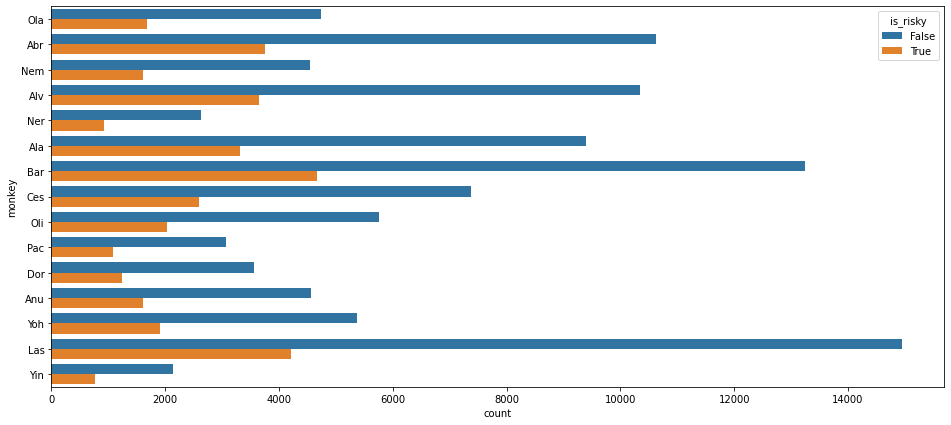

In [282]:
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot(y="monkey", hue="is_risky", data=df_bhv, ax=ax)
plt.show()